# Task 1

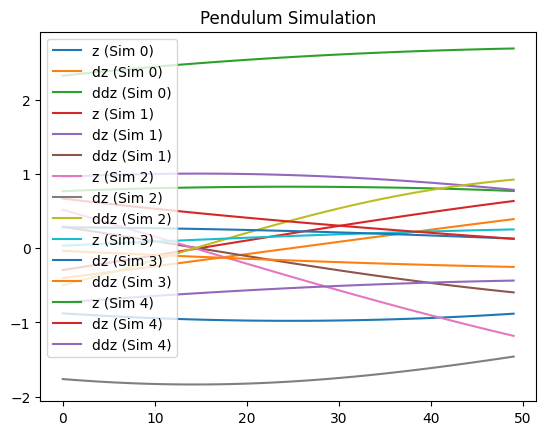

LASSO Coefficients: [ 0.         -0.38028907 -0.         -0.          0.04707781  0.
  0.         -0.          0.          0.        ]
Epoch 1/50, Train Loss: 51.892974853515625, Test Loss: 45.37637710571289
Epoch 2/50, Train Loss: 51.79331588745117, Test Loss: 45.28925704956055
Epoch 3/50, Train Loss: 51.69376754760742, Test Loss: 45.20222091674805
Epoch 4/50, Train Loss: 51.59431076049805, Test Loss: 45.11528015136719
Epoch 5/50, Train Loss: 51.49495315551758, Test Loss: 45.0284309387207
Epoch 6/50, Train Loss: 51.39570617675781, Test Loss: 44.94166946411133
Epoch 7/50, Train Loss: 51.296566009521484, Test Loss: 44.855003356933594
Epoch 8/50, Train Loss: 51.19752502441406, Test Loss: 44.768436431884766
Epoch 9/50, Train Loss: 51.09859085083008, Test Loss: 44.68195724487305
Epoch 10/50, Train Loss: 50.999778747558594, Test Loss: 44.595577239990234
Epoch 11/50, Train Loss: 50.901065826416016, Test Loss: 44.50930404663086
Epoch 12/50, Train Loss: 50.8024787902832, Test Loss: 44.42313003

Epoch 21/50, Train Loss: 49.9204216003418, Test Loss: 43.65221405029297
Epoch 22/50, Train Loss: 49.82302474975586, Test Loss: 43.56709289550781
Epoch 23/50, Train Loss: 49.72576141357422, Test Loss: 43.48208999633789
Epoch 24/50, Train Loss: 49.62861633300781, Test Loss: 43.39719772338867
Epoch 25/50, Train Loss: 49.531612396240234, Test Loss: 43.31241226196289
Epoch 26/50, Train Loss: 49.434722900390625, Test Loss: 43.227745056152344
Epoch 27/50, Train Loss: 49.33796310424805, Test Loss: 43.1431884765625
Epoch 28/50, Train Loss: 49.241329193115234, Test Loss: 43.05875015258789
Epoch 29/50, Train Loss: 49.14484405517578, Test Loss: 42.97442626953125
Epoch 30/50, Train Loss: 49.04848098754883, Test Loss: 42.89021682739258
Epoch 31/50, Train Loss: 48.952247619628906, Test Loss: 42.806129455566406
Epoch 32/50, Train Loss: 48.85614776611328, Test Loss: 42.72214889526367
Epoch 33/50, Train Loss: 48.76018524169922, Test Loss: 42.6382942199707
Epoch 34/50, Train Loss: 48.66436004638672, Test

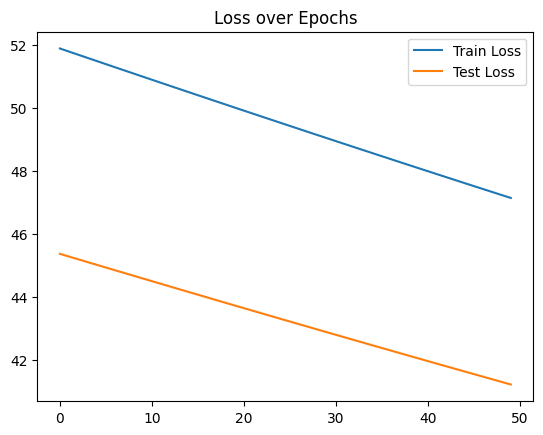

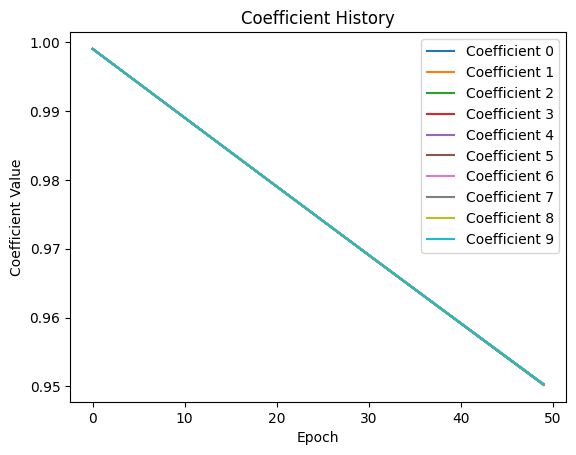

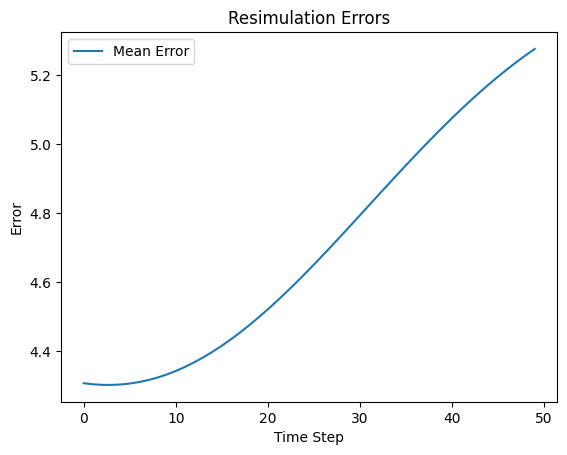

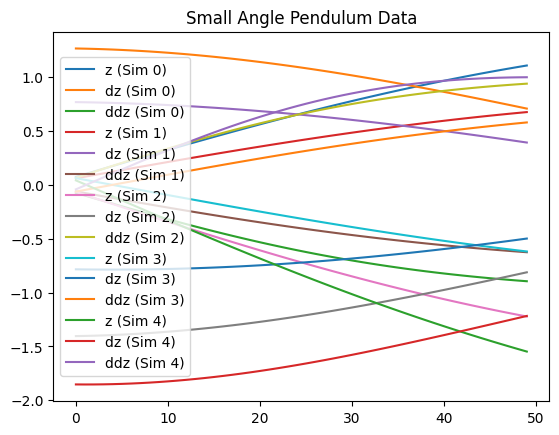

LASSO Coefficients (Small Angle): [ 0.         -0.47213032 -0.11204426 -0.          0.          0.
  0.          0.          0.          0.        ]
Epoch 1/50, Train Loss: 21.17073631286621, Test Loss: 22.055438995361328
Epoch 2/50, Train Loss: 21.129980087280273, Test Loss: 22.013290405273438
Epoch 3/50, Train Loss: 21.089262008666992, Test Loss: 21.97118377685547
Epoch 4/50, Train Loss: 21.048585891723633, Test Loss: 21.92911720275879
Epoch 5/50, Train Loss: 21.00795555114746, Test Loss: 21.887088775634766
Epoch 6/50, Train Loss: 20.96736717224121, Test Loss: 21.8450984954834
Epoch 7/50, Train Loss: 20.926820755004883, Test Loss: 21.803150177001953
Epoch 8/50, Train Loss: 20.88631820678711, Test Loss: 21.76123046875
Epoch 9/50, Train Loss: 20.845861434936523, Test Loss: 21.7193546295166
Epoch 10/50, Train Loss: 20.805448532104492, Test Loss: 21.67751121520996
Epoch 11/50, Train Loss: 20.765085220336914, Test Loss: 21.635705947875977
Epoch 12/50, Train Loss: 20.724767684936523, Test 

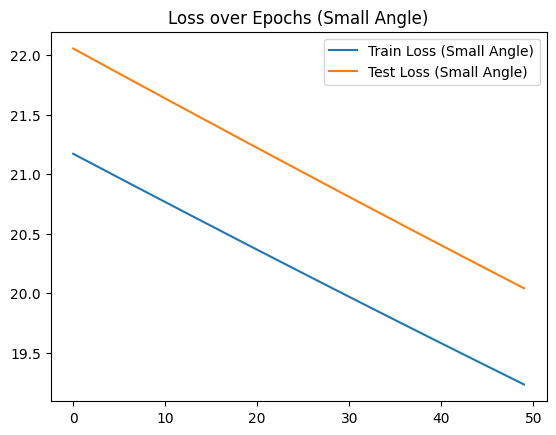

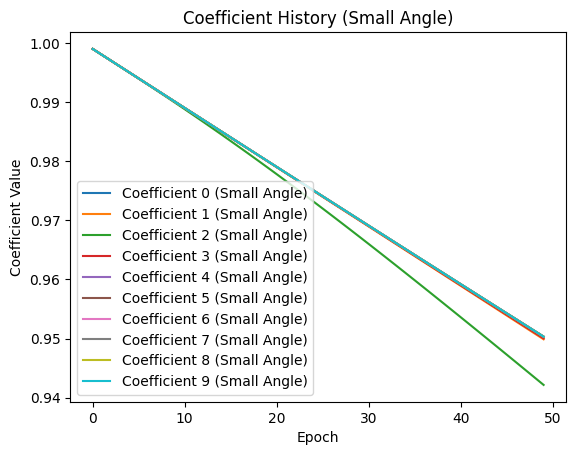

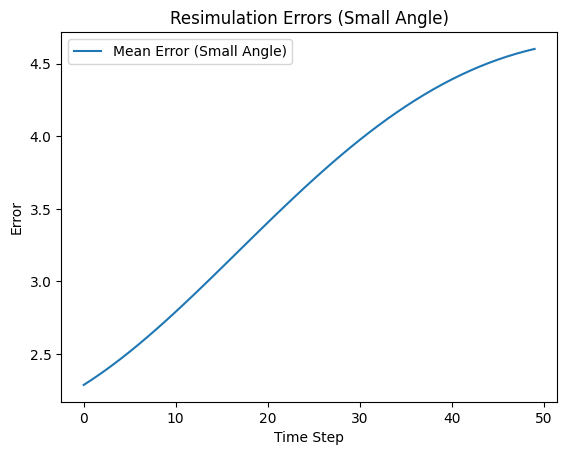

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.linear_model import Lasso
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split

# Task 1.1 - Simulation
def pendulum_rhs(zt, dzt, coefficients, terms):
    """Computes the scalar product Theta(z, zt) * coefficients."""
    term_values = np.array([term(zt, dzt) for term in terms], dtype=float)
    return np.dot(term_values, coefficients)

def pendulum_ode_step(y, t, coefficients, terms):
    zt, dzt = y
    ddzt = pendulum_rhs(zt, dzt, coefficients, terms)
    return [dzt, ddzt]

def simulate_pendulum(z0, dz0, coefficients, terms, T, dt):
    t_vals = np.arange(0, T * dt, dt)
    result = odeint(pendulum_ode_step, [z0, dz0], t_vals, args=(coefficients, terms))
    return result

def create_pendulum_data(z0_min, z0_max, dz0_min, dz0_max, coefficients, terms, T, dt, N, rejection=True):
    output_matrix = np.zeros((N, T, 3))
    for n in range(N):
        while True:
            z0 = np.random.uniform(z0_min, z0_max)
            dz0 = np.random.uniform(dz0_min, dz0_max)
            if not rejection or abs(0.5 * dz0**2 - np.cos(z0)) <= 0.99:
                break
        result = simulate_pendulum(z0, dz0, coefficients, terms, T, dt)
        for i, (z, dz) in enumerate(result):
            ddz = pendulum_rhs(z, dz, coefficients, terms)
            output_matrix[n, i] = [z, dz, ddz]
    return output_matrix

def plot_pendulum_data(training_data, num_to_plot, title="Pendulum Data"):
    for j in range(num_to_plot):
        plt.plot(training_data[j, :, 0], label=f"z (Sim {j})")
        plt.plot(training_data[j, :, 1], label=f"dz (Sim {j})")
        plt.plot(training_data[j, :, 2], label=f"ddz (Sim {j})")
    plt.title(title)
    plt.legend()
    plt.show()

# Simulation parameters
terms = [lambda z, dz: np.sin(z)]
coefficients = [-1.0]
training_data = create_pendulum_data(-np.pi, np.pi, -2.1, 2.1, coefficients, terms, T=50, dt=0.02, N=5)
plot_pendulum_data(training_data, num_to_plot=5, title="Pendulum Simulation")

# Task 1.2 - Implementation & Training
function_library = [
    lambda z, dz: 1,
    lambda z, dz: z,
    lambda z, dz: dz,
    lambda z, dz: np.sin(z),
    lambda z, dz: z**2,
    lambda z, dz: z * dz,
    lambda z, dz: z * np.sin(z),
    lambda z, dz: dz**2,
    lambda z, dz: dz * np.sin(z),
    lambda z, dz: np.sin(z)**2
]

def prepare_data_for_lasso(training_data, theta):
    z_dot_dot = training_data[:, :, 2].flatten()
    theta_results = np.array([
        [f(z, dz) for f in theta] for sim in training_data for z, dz in sim[:, :2]
    ])
    return z_dot_dot, theta_results

z_dot_dot, theta_results = prepare_data_for_lasso(training_data, function_library)

# LASSO model
lasso = Lasso(alpha=0.1)
lasso.fit(theta_results, z_dot_dot)
lasso_coefficients = lasso.coef_
print("LASSO Coefficients:", lasso_coefficients)

# PyTorch implementation of SINDy
class SINDy(nn.Module):
    def __init__(self, coefficients, mask, terms):
        super(SINDy, self).__init__()
        self.coefficients = nn.Parameter(torch.tensor(coefficients, dtype=torch.float32))
        self.mask = torch.tensor(mask, dtype=torch.float32)
        self.terms = terms

    def forward(self, z, dz):
        term_values = torch.stack(
            [torch.tensor([f(z_i.item(), dz_i.item()) for z_i, dz_i in zip(z, dz)], dtype=torch.float32) for f in self.terms],
            dim=1,
        )
        return torch.sum(self.coefficients * self.mask * term_values, dim=1)

def SINDy_loss(ddz, ddz_hat, lambda_param, coefficients):
    residuals = ddz - ddz_hat
    loss = torch.mean(residuals**2) + lambda_param * torch.norm(coefficients, p=1)
    return loss

def train_sindy(model, z_train, dz_train, y_train, z_test, dz_test, y_test, n_epochs, learning_rate=0.001, lambda_param=0.1, thresholding=None):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train_losses, test_losses = [], []
    coefficient_history = []

    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()

        y_hat = model(torch.tensor(z_train, dtype=torch.float32), torch.tensor(dz_train, dtype=torch.float32))
        loss = SINDy_loss(torch.tensor(y_train, dtype=torch.float32), y_hat, lambda_param, model.coefficients)

        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        coefficient_history.append(model.coefficients.detach().numpy().copy())

        if thresholding == "sequential":
            mask = torch.abs(model.coefficients) > 0.1
            model.coefficients.data = model.coefficients.data * mask

        model.eval()
        with torch.no_grad():
            y_hat_test = model(torch.tensor(z_test, dtype=torch.float32), torch.tensor(dz_test, dtype=torch.float32))
            test_loss = SINDy_loss(torch.tensor(y_test, dtype=torch.float32), y_hat_test, lambda_param, model.coefficients)
            test_losses.append(test_loss.item())

        print(f"Epoch {epoch + 1}/{n_epochs}, Train Loss: {loss.item()}, Test Loss: {test_loss.item()}")

    return train_losses, test_losses, coefficient_history

z_train, z_test, dz_train, dz_test, y_train, y_test = train_test_split(
    training_data[:, :, 0].flatten(), training_data[:, :, 1].flatten(), training_data[:, :, 2].flatten(), test_size=0.2, random_state=42
)

coefficients = np.ones(len(function_library))
mask = np.ones(len(function_library))
sindy_model = SINDy(coefficients, mask, function_library)

train_losses, test_losses, coefficient_history = train_sindy(
    sindy_model,
    z_train, dz_train, y_train,
    z_test, dz_test, y_test,
    n_epochs=50, learning_rate=0.001, lambda_param=0.1, thresholding="sequential"
)

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# Plot coefficient history
coefficient_history = np.array(coefficient_history)
for i in range(coefficient_history.shape[1]):
    plt.plot(coefficient_history[:, i], label=f"Coefficient {i}")
plt.title("Coefficient History")
plt.xlabel("Epoch")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

# Resimulation Error Analysis
def resimulate(test_data, coefficients, terms):
    errors = []
    for sim in test_data:
        z, dz, ddz_true = sim[:, 0], sim[:, 1], sim[:, 2]
        ddz_pred = [pendulum_rhs(z[i], dz[i], coefficients, terms) for i in range(len(z))]
        errors.append(np.abs(np.array(ddz_true) - np.array(ddz_pred)))
    return errors

resimulation_errors = resimulate(training_data[:5], sindy_model.coefficients.detach().numpy(), function_library)
mean_errors = np.mean(resimulation_errors, axis=0)

plt.plot(mean_errors, label="Mean Error")
plt.title("Resimulation Errors")
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.legend()
plt.show()

# Task 1.5 - Small Angle Approximation
def small_angle_data():
    """Generate small angle data."""
    return create_pendulum_data(-np.pi/36, np.pi/36, -2.1, 2.1, [-1.0], [lambda z, dz: np.sin(z)], T=50, dt=0.02, N=5)

small_training_data = small_angle_data()
plot_pendulum_data(small_training_data, num_to_plot=5, title="Small Angle Pendulum Data")

# Retrain models with small angle data
z_dot_dot_small, theta_results_small = prepare_data_for_lasso(small_training_data, function_library)
lasso_small = Lasso(alpha=0.1)
lasso_small.fit(theta_results_small, z_dot_dot_small)
lasso_coefficients_small = lasso_small.coef_
print("LASSO Coefficients (Small Angle):", lasso_coefficients_small)

z_train_small, z_test_small, dz_train_small, dz_test_small, y_train_small, y_test_small = train_test_split(
    small_training_data[:, :, 0].flatten(), small_training_data[:, :, 1].flatten(), small_training_data[:, :, 2].flatten(), test_size=0.2, random_state=42
)

sindy_model_small = SINDy(coefficients, mask, function_library)
train_losses_small, test_losses_small, coefficient_history_small = train_sindy(
    sindy_model_small,
    z_train_small, dz_train_small, y_train_small,
    z_test_small, dz_test_small, y_test_small,
    n_epochs=50, learning_rate=0.001, lambda_param=0.1, thresholding="sequential"
)

plt.plot(train_losses_small, label='Train Loss (Small Angle)')
plt.plot(test_losses_small, label='Test Loss (Small Angle)')
plt.legend()
plt.title('Loss over Epochs (Small Angle)')
plt.show()

# Plot coefficient history for small angles
coefficient_history_small = np.array(coefficient_history_small)
for i in range(coefficient_history_small.shape[1]):
    plt.plot(coefficient_history_small[:, i], label=f"Coefficient {i} (Small Angle)")
plt.title("Coefficient History (Small Angle)")
plt.xlabel("Epoch")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()

# Resimulation and Error Analysis for Small Angles
resimulation_errors_small = resimulate(small_training_data[:5], sindy_model_small.coefficients.detach().numpy(), function_library)
mean_errors_small = np.mean(resimulation_errors_small, axis=0)

plt.plot(mean_errors_small, label="Mean Error (Small Angle)")
plt.title("Resimulation Errors (Small Angle)")
plt.xlabel("Time Step")
plt.ylabel("Error")
plt.legend()
plt.show()


# Task 2